<a href='https://www.altschoolafrica.com/'> <h2> Python for Data Engineering </h2></a>


# <center> CAPSTONE PROJECT 1 <br> 

## <center>Exploratory Data Analysis (EDA) of US flights <br> (using Pandas, Matplotlib & Seaborn)

<img src='altschool.jpeg' width=50%>


In [2]:
import numpy as np
import pandas as pd
# pip install seaborn 
import seaborn as sns
import matplotlib.pyplot as plt

Consider the following terms we use:
* unique flight - a record (row) in the dataset
* completed flight = flight that is not cancelled (Cancelled==0 in the dataset)
* flight code - a combination of ['UniqueCarrier','FlightNum'], i.e.  UA52
* airport code - a three letter airport alias from 'Origin or 'Dest' columns

**Reading data into memory and creating a Pandas ``DataFrame`` object**

(This may take a while, be patient)

We are not going to read in the whole dataset. In order to reduce memory footprint, we instead load only needed columns and cast them to suitable data types.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
dtype = {'DayOfWeek': np.uint8, 'DayofMonth': np.uint8, 'Month': np.uint8 , 
         'Cancelled': np.uint8, 'Year': np.uint16, 'FlightNum': np.uint16 , 
         'Distance': np.uint16, 'UniqueCarrier': str, 'CancellationCode': str, 
         'Origin': str, 'Dest': str, 'ArrDelay': np.float16, 
         'DepDelay': np.float16, 'CarrierDelay': np.float16, 
         'WeatherDelay': np.float16, 'NASDelay': np.float16, 
         'SecurityDelay': np.float16, 'LateAircraftDelay': np.float16, 
         'DepTime': np.float16}

In [7]:
dtype['DayOfWeek']

numpy.uint8

In [6]:
%%time
# change the path if needed
#path = "C:/Users/Opeyemi/Documents/ML_course_AI/data_notes/jupyter_english/assignments_spring2019/2008 (1).csv.bz2"
path = "/Users/semiubiliaminu/my_folder/microclick/altschool_project/capstone_project/2008.csv.bz2"
flights_df = pd.read_csv(path, usecols=dtype.keys(), dtype=dtype)

CPU times: user 12.2 s, sys: 540 ms, total: 12.7 s
Wall time: 13.2 s


**Check the number of rows and columns and print column names.**

In [13]:
print(flights_df.shape)
print(flights_df.columns)

(7009728, 19)
Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'FlightNum', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'Cancelled', 'CancellationCode', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


**Print first 5 rows of the dataset.**

In [10]:
flights_df.head()

Year  Month  DayofMonth  DayOfWeek  DepTime UniqueCarrier  FlightNum  \
0  2008      1           3          4   1343.0            WN        588   
1  2008      1           3          4   1125.0            WN       1343   
2  2008      1           3          4   2009.0            WN       3841   
3  2008      1           3          4    903.0            WN          3   
4  2008      1           3          4   1423.0            WN         25   

   ArrDelay  DepDelay Origin Dest  Distance  Cancelled CancellationCode  \
0      16.0      18.0    HOU  LIT       393          0              NaN   
1       2.0       5.0    HOU  MAF       441          0              NaN   
2      -4.0      -6.0    HOU  MAF       441          0              NaN   
3      -2.0       8.0    HOU  MCO       848          0              NaN   
4      16.0      23.0    HOU  MCO       848          0              NaN   

   CarrierDelay  WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay  
0          16.0           0.0       0.0            0.0                0.0  
1           NaN           NaN       NaN            NaN                NaN  
2           NaN           NaN       NaN            NaN                NaN  
3           NaN           NaN       NaN            NaN                NaN  
4          16.0           0.0       0.0            0.0                0.0

**Transpose the frame to see all features at once.**

In [6]:
flights_df.head().T

0     1     2     3     4
Year               2008  2008  2008  2008  2008
Month                 1     1     1     1     1
DayofMonth            3     3     3     3     3
DayOfWeek             4     4     4     4     4
DepTime            2003   754   628   926  1829
UniqueCarrier        WN    WN    WN    WN    WN
FlightNum           335  3231   448  1746  3920
ArrDelay            -14     2    14    -6    34
DepDelay              8    19     8    -4    34
Origin              IAD   IAD   IND   IND   IND
Dest                TPA   TPA   BWI   BWI   BWI
Distance            810   810   515   515   515
Cancelled             0     0     0     0     0
CancellationCode    NaN   NaN   NaN   NaN   NaN
CarrierDelay        NaN   NaN   NaN   NaN     2
WeatherDelay        NaN   NaN   NaN   NaN     0
NASDelay            NaN   NaN   NaN   NaN     0
SecurityDelay       NaN   NaN   NaN   NaN     0
LateAircraftDelay   NaN   NaN   NaN   NaN    32

**Examine data types of all features and total dataframe size in memory.**

In [65]:
miss_percent = 100 * (flights_df.isnull().sum()/len(flights_df))

In [66]:
miss_percent

Year                  0.000000
Month                 0.000000
DayofMonth            0.000000
DayOfWeek             0.000000
DepTime               1.943670
UniqueCarrier         0.000000
FlightNum             0.000000
ArrDelay              2.206919
DepDelay              1.943670
Origin                0.000000
Dest                  0.000000
Distance              0.000000
Cancelled             0.000000
CancellationCode     98.039382
CarrierDelay         78.248300
WeatherDelay         78.248300
NASDelay             78.248300
SecurityDelay        78.248300
LateAircraftDelay    78.248300
dtype: float64

**Get basic statistics of each feature.**

In [8]:
flights_df.describe().T

count         mean          std     min     25%  \
Year               7009728.0  2008.000000     0.000000  2008.0  2008.0   
Month              7009728.0     6.375130     3.406737     1.0     3.0   
DayofMonth         7009728.0    15.728015     8.797068     1.0     8.0   
DayOfWeek          7009728.0     3.924182     1.988259     1.0     2.0   
DepTime            6873482.0          NaN          NaN     1.0   928.0   
FlightNum          7009728.0  2224.200105  1961.715999     1.0   622.0   
ArrDelay           6855029.0          NaN          NaN  -519.0   -10.0   
DepDelay           6873482.0          NaN          NaN  -534.0    -4.0   
Distance           7009728.0   726.387029   562.101803    11.0   325.0   
Cancelled          7009728.0     0.019606     0.138643     0.0     0.0   
CarrierDelay       1524735.0          NaN          NaN     0.0     0.0   
WeatherDelay       1524735.0          NaN          NaN     0.0     0.0   
NASDelay           1524735.0          NaN          NaN     0.0     0.0   
SecurityDelay      1524735.0          NaN          NaN     0.0     0.0   
LateAircraftDelay  1524735.0          NaN          NaN     0.0     0.0   

                      50%     75%     max  
Year               2008.0  2008.0  2008.0  
Month                 6.0     9.0    12.0  
DayofMonth           16.0    23.0    31.0  
DayOfWeek             4.0     6.0     7.0  
DepTime            1325.0  1728.0  2400.0  
FlightNum          1571.0  3518.0  9743.0  
ArrDelay             -2.0    12.0  2460.0  
DepDelay             -1.0     8.0  2468.0  
Distance            581.0   954.0  4962.0  
Cancelled             0.0     0.0     1.0  
CarrierDelay          0.0    16.0  2436.0  
WeatherDelay          0.0     0.0  1352.0  
NASDelay              6.0    21.0  1357.0  
SecurityDelay         0.0     0.0   392.0  
LateAircraftDelay     0.0    26.0  1316.0

**Count unique Carriers and plot their relative share of flights:**

In [70]:
flights_df['UniqueCarrier'].nunique()

20

In [72]:
flights_df.groupby('UniqueCarrier').size().sort_values(ascending=False)

UniqueCarrier
WN    1201754
AA     604885
OO     567159
MQ     490693
US     453589
DL     451931
UA     449515
XE     374510
NW     347652
CO     298455
EV     280575
9E     262208
FL     261684
YV     254930
OH     197607
B6     196091
AS     151102
F9      95762
HA      61826
AQ       7800
dtype: int64

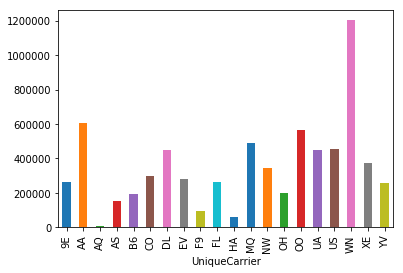

In [10]:
flights_df.groupby('UniqueCarrier').size().plot(kind='bar');

**We can also _group by_ category/categories in order to calculate different aggregated statistics.**

**For example, finding top-3 flight codes, that have the largest total distance travelled in year 2008.**

In [11]:
flights_df.groupby(['UniqueCarrier','FlightNum'])['Distance'].sum().sort_values(
    ascending=False).iloc[:3]

UniqueCarrier  FlightNum
CO             15           1796244.0
               14           1796244.0
UA             52           1789722.0
Name: Distance, dtype: float64

**Another way:**

In [12]:
flights_df.groupby(['UniqueCarrier','FlightNum'])\
  .agg({'Distance': [np.mean, np.sum, 'count'],
        'Cancelled': np.sum})\
  .sort_values(('Distance', 'sum'), ascending=False)\
  .iloc[0:3]

Distance                  Cancelled
                                mean        sum count       sum
UniqueCarrier FlightNum                                        
CO            15         4962.000000  1796244.0   362         0
              14         4962.000000  1796244.0   362         0
UA            52         2465.181818  1789722.0   726         8

**Number of flights by days of week and months:**

In [13]:
pd.crosstab(flights_df.Month, flights_df.DayOfWeek)

DayOfWeek       1       2       3       4       5      6      7
Month                                                          
1           80807   97298  100080  102043   81940  67178  76419
2           81504   79700   80587   82158  102726  66462  76099
3          103210   81159   82307   82831   82936  86153  97494
4           82463  100785  102586   82799   82964  68304  78225
5           80626   79884   81264  102572  102878  84493  74576
6          104168   82160   82902   83617   83930  72322  99566
7           84095  103429  103315  105035   79349  72219  80489
8           82983   80895   81773   82625  103878  86155  93970
9           94300   91533   74057   75589   75881  58343  71205
10          75131   72195   91900   94123   93894  58168  70794
11          74214   72443   73653   68071   70484  76031  88376
12          92700   90568   85241   70761   74306  61708  69674

**It can also be handy to color such tables in order to easily notice outliers:**

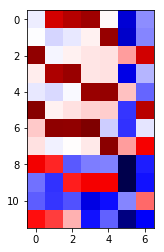

In [14]:
plt.imshow(pd.crosstab(flights_df.Month, flights_df.DayOfWeek),
           cmap='seismic', interpolation='none');

**Flight distance histogram:**

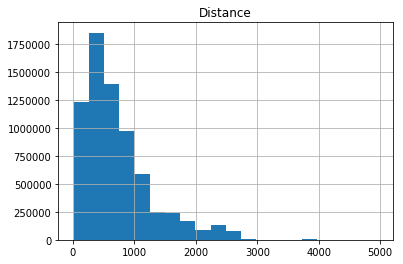

In [15]:
flights_df.hist('Distance', bins=20);

**Making a histogram of flight frequency by date.**

In [21]:
flights_df['Date'] = pd.to_datetime(flights_df.rename(
    columns={'DayofMonth': 'Day'})[['Year', 'Month', 'Day']])

In [23]:
num_flights_by_date = flights_df.groupby('Date').size()

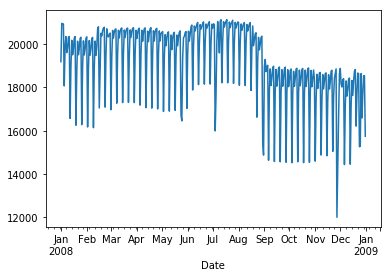

In [28]:
num_flights_by_date.plot()

**Do you see a weekly pattern above? And below?**

In [5]:
num_flights_by_date.rolling(window=7).mean().plot()

NameError: name 'num_flights_by_date' is not defined

### Now it's your turn. Answer the questions below.

##### The next 20 questions is going to be very tasking so get ready, but don't worry it's easy

**1. How many unique carriers are there in our dataset?**


- 10
- 15
- 20
- 25 

In [872]:
# You code here
len(flights_df['UniqueCarrier'].value_counts())

20

**2. We have  both cancelled and completed flights in the datset. Check if there are more completed or cancelled flights. What is the difference?** <br>

*Hint:* Take a look at *Cancelled* to see the categories and *FlightNum* column to calculate unique flights for each category.

- Cancelled overweights completed by 329 flights
- Completed overweights cancelled by 6734860 flights
- Cancelled overweights completed by 671 flights
- Completed overweights cancelled by 11088967 flights

Consider the following terms we use:

unique flight - a record (row) in the dataset
completed flight = flight that is not cancelled (Cancelled==0 in the dataset)
flight code - a combination of ['UniqueCarrier','FlightNum'], i.e. UA52
airport code - a three letter airport alias from 'Origin or 'Dest' columns

In [640]:
# You code here

cancel_flight = len(flights_df[flights_df['Cancelled'] == 1])
completed_flight = len(flights_df[flights_df['Cancelled'] == 0])

if completed_flight > cancel_flight:
    value = completed_flight - cancel_flight
    print("Completed overweights Cancelled by {} flights".format(cancel_flight, value ))
else:
    value = cancel_flight - completed_flight
    print("Cancelled overweights completed by {} flights".format(completed_flight, value ))
    

Completed overweights Cancelled by 64442 flights


**3. Find a flight with the longest departure delays and a flight with the longest arrival delay. Do they have the same destination airport, and if yes, what is its code?**



- yes, ATL
- yes, HNL
- yes, MSP
- no

In [676]:
# You code here
long_dep = flights_df[flights_df['DepDelay'] == flights_df['DepDelay'].max()]
long_arr = flights_df[flights_df['ArrDelay'] == flights_df['ArrDelay'].max()]

#not why the comparison operation not working. 
if long_dep['Dest'].equals(long_arr['Dest']):
    print("Yes {}".format(long_dep['Dest']))
    

**4. Find the carrier that has the greatest number of cancelled flights.**


- AA
- MQ
- WN
- CO 

In [975]:
# You code here

flights_df[flights_df['Cancelled'] == 1]['UniqueCarrier'].value_counts().iloc[:1]

AA    10784
Name: UniqueCarrier, dtype: int64

**5. Let's examine departure time (*DepTime* column). Let's see how all flights are distributed by time. For simplicity, consider distribution by hour. Which hour has the highest percentage of flights?**<br>


*Hint:* Check time format [here](https://www.transtats.bts.gov/Fields.asp?Table_ID=236).

- 1 am 
- 6 am
- 11 am  
- 3 pm 


In [979]:
# You code here
from time import gmtime, strftime

from datetime import datetime


# split_time = str(flights_df[['DepTime']].value_counts().idxmax()).split(',')[0].split('(')[1]
# time = split_time.split('.')[0]
# d = datetime.strptime("0600:00", "%H:%M")
# d.strftime("%I:%M" %p)

flights_df[['DepTime']].value_counts().idxmax()[0]

#600.0 i.e 0600 in 24hour time format


600.0

In [968]:
#Month with least percentage of cancelled flight
flights_df[flights_df['Cancelled'] == 1]['Month'].value_counts().iloc[-1:]

4    10355
Name: Month, dtype: int64

**7. Is there any hour that didn't have any cancelled flights at all? Check all that apply.**

- 3
- 19
- 22
- 4

In [609]:
# You code here
#month with no cancel flight
flights_df.groupby(['Month'])[['Month','Cancelled']].value_counts()

Month  Cancelled
1      0            588457
       1             17308
2      0            548640
       1             20596
3      0            599907
       1             16183
4      0            587771
       1             10355
dtype: int64

**8. Find the busiest hour, or in other words, the hour when the number of departed flights reaches its maximum.**<br>


*Hint:* Consider only *completed* flights.

- 20
- 21
- 9
- 6

In [1011]:
#you code here

flights_df[flights_df['Cancelled'] == 0][['DepTime']].value_counts().iloc[:1]

DepTime
600.0      5733
dtype: int64

**9. Since we know the departure hour, it might be interesting to examine the average delay for corresponding hour. Are there any cases, when the planes on average departed earlier than they should have done? And if yes, at what departure hours did it happen?**<br>

*Hint:* Consider only *completed* flights.

- no, there are no such cases
- yes, at 5-7 am
- yes, at 9-11 am
- yes, at 1-3 pm

In [673]:
# You code here

#######  NOT CORRECT ###########

# hour = flights_df[flights_df['Cancelled'] == 0][['DepTime']].value_counts().iloc[:1]
# ahour = str(hour).split()[1]
ave_delay = flights_df[flights_df['DepTime'] == 600][['ArrDelay','DepDelay']].apply(lambda x: x>0).mean()
ave_delay
flights_df.groupby(['UniqueCarrier','DepTime'])['DepTime'].value_counts()
flights_df[flights_df['DepTime'] >= ave_delay[1]][['DepTime','UniqueCarrier']].value_counts()
# ave_delay[1]

DepTime  UniqueCarrier
700.0    WN               1112
2056.0   WN               1111
2104.0   WN               1105
2052.0   WN               1100
630.0    WN               1067
                          ... 
509.0    9E                  1
143.0    FL                  1
304.0    WN                  1
508.0    YV                  1
235.0    AS                  1
Length: 22650, dtype: int64

**10. Considering only the completed flights by the carrier, that you have found in Question 3, find the distribution of these flights by hour. At what time does the greatest number of its planes depart?**<br>

*Hint:* Consider *all* flights.

- at noon
- at 6 am
- at 8 pm
- at 9 am

In [694]:
# You code here
#######  NOT CORRECT ###########
# carrier = flights_df[flights_df['DepDelay'] == flights_df['DepDelay'].max()]['UniqueCarrier']
# long_arr = flights_df[flights_df['ArrDelay'] == flights_df['ArrDelay'].max()]
#convert to string
# carrier_str = str(carrier).split()[1]
# carrier
# flights_df[flights_df['UniqueCarrier'] == carrier_str ][['Cancelled','DepTime','UniqueCarrier']].value_counts().head(1)
carrier = long_arr['UniqueCarrier'].iloc[0]
flights_df[flights_df['UniqueCarrier'] == carrier][['Cancelled']].apply(lambda x: x==0)
# flights_df['Cancelled' == 0].la

Cancelled
422709        True
422710        True
422711        True
422712        True
422713        True
...            ...
2237593       True
2237594       True
2237595       True
2237596       True
2237597       True

[122799 rows x 1 columns]

# **11. Find top-10 carriers in terms of the number of *completed* flights (_UniqueCarrier_ column)?**

**Which of the listed below is _not_ in your top-10 list?**

- DL
- AA
- OO
- EV

In [629]:
# You code here
top_ten = flights_df[flights_df['Cancelled'] == 0][['UniqueCarrier','Cancelled']].value_counts().head(10)
list_carrier = {'DL','AA','OO','EV'}
for i in list_carrier:
    if i not in top_ten:
        print(i)

EV


**12. Plot distributions of flight cancellation reasons (_CancellationCode_).**

**What is the most frequent reason for flight cancellation? (Use this [link](https://www.transtats.bts.gov/Fields.asp?Table_ID=236) to translate codes into reasons)**

- Carrier
- Weather conditions
- National Air System
- Security reasons

In [619]:
flights_df['Reasons'].value_counts()

Carrier                26075
Weather Conditions     25744
National Air System    12617
Security reasons           6
Name: Reasons, dtype: int64

<AxesSubplot:xlabel='Reasons', ylabel='count'>

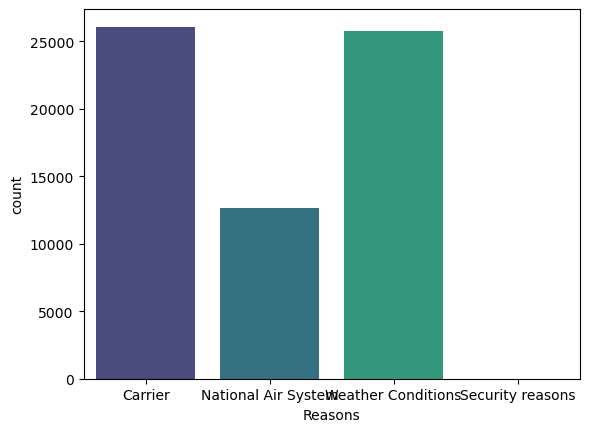

In [116]:
# You code here
import seaborn as sns

flights_df['Reasons'] = flights_df['CancellationCode'].fillna(value='NO VALUE')

reasons = {'A': 'Carrier', 'B':'Weather Conditions','C':'National Air System', 'D':'Security reasons' }
flights_df['Reasons'] = flights_df['CancellationCode'].map(reasons)

flights_df['Reasons'].value_counts()

## The most frequent reason for cancellation is due to Carrier

sns.countplot(x='Reasons', data=flights_df, palette='viridis')

# flights_df.plot.hist(by='Reasons', bin='4', alpha=0.5)

**13. Which route is the most frequent, in terms of the number of flights?**

*Hint: Take a look at _'Origin'_ and _'Dest'_ features. Consider _A->B_ and _B->A_ directions as _different_ routes)*

 - New-York – Washington (JFK-IAD)
 - San-Francisco – Los-Angeles (LAX-SFO)
 - San-Jose – Dallas (SJC-DFW)
 - New-York – San-Francisco (JFK-SFO)

In [618]:
# You code here

##### NOT COMPLETED YET #####

# flights_df.groupby(['Origin','Dest'])[['Origin', 'Dest']].value_counts()

flights_df[['Origin','Dest']].value_counts()
        


Origin  Dest
SFO     LAX     4686
LAX     SFO     4557
OGG     HNL     4321
HNL     OGG     4198
LAX     LAS     4142
                ... 
ATW     DSM        1
ONT     GJT        1
RNO     PIH        1
BOI     GJT        1
IAH     AGS        1
Length: 4981, dtype: int64

**14. Find top-5 delayed routes (count how many times they were delayed on departure). From all flights on these 5 routes, count all flights with weather conditions contributing to a delay.**

_Hint_: consider only positive delays

- 449 
- 539 
- 549 
- 668

In [572]:
# flights_df.groupby(['Origin','Dest'])['DepDelay'].head()
#top-5 delayed routes (count how many times they were delayed on departure)
routes = flights_df[flights_df['DepDelay'] > 0][['Origin','Dest']].value_counts().head()

routes[:5]
# Origin  Dest
# LAX     SFO     2226
# DAL     HOU     2063
# HOU     DAL     2017
# ORD     LGA     1978
# SFO     LAX     1901
# dtype: int64
for route in routes:
    print(route)


Origin  Dest
LAX     SFO     2226
DAL     HOU     2063
HOU     DAL     2017
ORD     LGA     1978
SFO     LAX     1901
dtype: int64

In [696]:
#flights_df[['DepDelay','Origin','Dest']] == flights_df[''] #.value_counts().head(10)
# for delay in flights_df.groupby(['Origin','Dest'])['DepDelay']:
#     print("**********")
#     print(delay)
#     print("**********")
#     if delay > 0:
#         print("****nottttttt******")
#         print(flights_df[['DepDelay','Origin','Dest']])
#         print("*******jjjjjjjjj***")
#     else:
#         print("is less than")
        

flights_df.groupby(['Origin','Dest'])['DepDelay']

**15. Examine the hourly distribution of departure times. For that, create a new series from DepTime, removing missing values.**

**Choose all correct statements:**
 - Flights are normally distributed within time interval [0-23] (Search for: Normal distribution, bell curve).
 - Flights are uniformly distributed within time interval [0-23].
 - In the period from 0 am to 4 am there are considerably less flights than from 7 pm to 8 pm.

<AxesSubplot:ylabel='Frequency'>

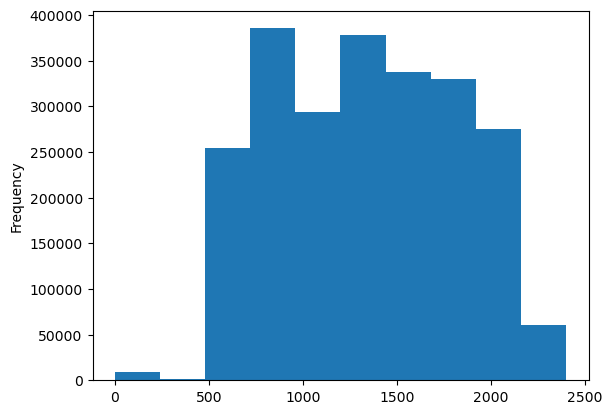

In [408]:
# You code here

flights_df['New_DepTime'] = flights_df['DepTime'].dropna()
flights_df['New_DepTime'].value_counts().describe()

flights_df['New_DepTime'].plot(kind ='hist')

#Statement are:
# Flights are normally distributed within time interval
# In the period from 0 am to 4 am there are considerably less flights than from 7 pm to 8 pm.


# Visualizing the data base on day of the week and month

#### From the visualization above, we can infer that the number of flights during weekends is less than weekdays and Saturday has the lowest number of flights. Also, for the month category, there seems to be more flights during Summer than winter.

**16. Show how the number of flights changes through time (on the daily/weekly/monthly basis) and interpret the findings.**

**Choose all correct statements:**
- The number of flights during weekends is less than during weekdays (working days).
- The lowest number of flights is on Sunday.
- There are less flights during winter than during summer.

_Hint_: Look for official meteorological winter months for the Nothern Hemisphsere.

In [405]:
flights_df.groupby(['DepTime'])[['Month','DayofMonth','DayOfWeek']].value_counts()
#flights_df.groupby(['DepTime'])[['Month']].value_counts()
# flights_df.groupby(['DepTime'])[['DayofMonth']].value_counts()
# flights_df.groupby(['DepTime'])[['DayOfWeek']].value_counts()
#remove missing value
#flights_df['Month'].dropna()
flights_df.groupby(['DepTime'])[['Month']].value_counts()

#get winter period
dec_winter = flights_df[flights_df['Month'] == 12]
jan_winter = flights_df[flights_df['Month'] == 1]
feb_winter = flights_df[flights_df['Month'] == 2]

winter = len(dec_winter + jan_winter + feb_winter)

#summer
jun_summer = flights_df[flights_df['Month'] == 6]
jul_summer = flights_df[flights_df['Month'] == 7]
aug_summer = flights_df[flights_df['Month'] == 8]
summer = len(jun_summer + jul_summer + aug_summer)

if summer > winter:
    print("There are less flights during winter with value of {} than during summer with value of {}".format(winter,summer))
else:
    print("There are less flights during summer with value  of '{}' than during winter with value of {}".format(summer,winter))



There are less flights during summer with value  of '0' than during winter with value of 1175001


<AxesSubplot:title={'center':'Flight changes with Time'}, ylabel='Frequency'>

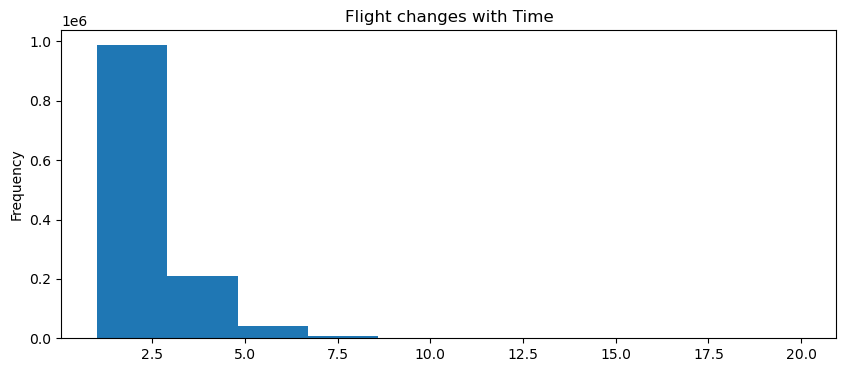

In [407]:
distribution = flights_df.groupby(['UniqueCarrier','DepTime'])[['Month','DayofMonth','DayOfWeek']].value_counts()

distribution.plot(kind='hist', figsize = (10,4), title='Flight changes with Time')

#### A -  *Carrier*
#### B -  *Weather*
#### C - *National Air System*
#### D - Security

**17. Examine the distribution of cancellation reasons with time. Make a bar plot of cancellation reasons aggregated by months.**

**Choose all correct statements:**
- October has the lowest number of cancellations due to weather.
- The highest number of cancellations in September is due to Security reasons.
- April's top cancellation reason is carriers.
- Flights cancellations due to National Air System are more frequent than those due to carriers.

<AxesSubplot:title={'center':'Distribution of Cancellation with Month'}, xlabel='Reasons,Month'>

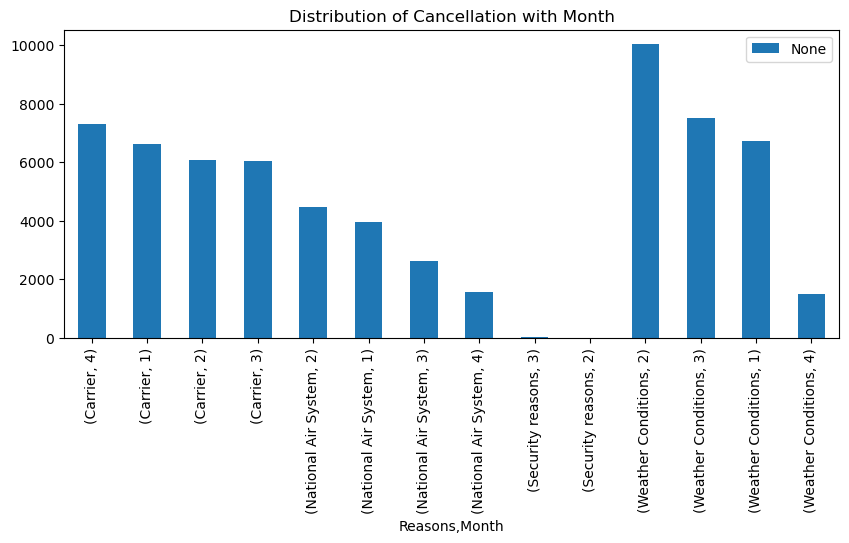

In [395]:
# You code here
agg_month = flights_df.groupby(['Reasons'])[['Month']].value_counts()

agg_month.plot(kind = 'bar', figsize = (10,4), title="Distribution of Cancellation with Month", legend=True)

##Statement
## April's top cancellation reason is carriers.


**18. Which month has the greatest number of cancellations due to Carrier?** 
- May
- January
- September
- April

In [155]:
# You code here
months = {'1':'January', '2':'February', '3':'March', '4':'April', '5':'May', '6':'June', '7':'July', '8':'August', '9':'september','10':'October', '11':'November', '12':'December'}
flights_df['Month'].map(months)

gratest_concellation = flights_df[flights_df['Reasons'] == 'Carrier']['Month'].value_counts().iloc[:1]
gratest_concellation


4    7312
Name: Month, dtype: int64

**19. Identify the carrier with the greatest number of cancellations due to carrier in the corresponding month from the previous question.**

- 9E
- EV
- HA
- AA

In [400]:
# You code here
flights_df[flights_df['Reasons'] == 'Carrier'][['Month','UniqueCarrier']].value_counts().iloc[:1]


Month  UniqueCarrier
4      AA               3696
dtype: int64

**20. Examine median arrival and departure delays (in time) by carrier. Which carrier has the lowest median delay time for both arrivals and departures? Leave only non-negative values of delay times ('ArrDelay', 'DepDelay').
([Boxplots](https://seaborn.pydata.org/generated/seaborn.boxplot.html) can be helpful in this exercise, as well as it might be a good idea to remove outliers in order to build nice graphs. You can exclude delay time values higher than a corresponding .95 percentile).**
- EV
- OO
- AA
- AQ

That's it! Now go and do 30 push-ups! :). You are now a guru in Data Manipulation and Analysis with Python

In [615]:
median = flights_df[flights_df[['DepDelay','ArrDelay']].apply(lambda x: x > 0)][['DepDelay','ArrDelay']].median()

flights_df[flights_df['DepDelay'] == median[0] ]['UniqueCarrier'].value_counts()[-1:]

AQ    33
Name: UniqueCarrier, dtype: int64

In [616]:
flights_df[flights_df['ArrDelay'] == median[1] ]['UniqueCarrier'].value_counts()[-1:]

AQ    24
Name: UniqueCarrier, dtype: int64